# Classes and modules

## Recall

Last unit we learned how to use control structures like ```for```, ```if``` and ```functions```.
We used this knowledge to complete the code to read in the comma-separated-values-files.

<details>
  <summary>Show Code</summary>

```Python
def process_csv(csv_file, dishes):
    """!
        @brief This function reads in specific csv-file and adds the contents into the dict dishes
        @details We assume that we get an csv-file with a header line and 7 fields per row.
            The name and contents of the csv-file should be defined as given in param, so we can extract the day and dish number.
            The contents are then stored in a dict passed as dishes defined in param.
        @param csv_file the path to the csv-file as a str, it should follow the form Day_[day]_dish_[dish]_zoom_[zoom].csv,
            where all [] denote numbers extracted as meta data.
            The 5th field should contain the area of the cells.
        @param dishes a dict that will be filled with the contents of the csv-file.
            The first layer of keys will be the dish-numbers, the values belonging to them are dicts.
            These dicts contain the days as keys and dicts as values. The lowest layer dicts contain
            the "cell_count" and "area" as keys. Their values are the total cell-count for that day and dish and the
            total area for that day and dish respectivley.
        @return None
    """
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number, _, zoom_factor = csv_file.split("_")
        cell_counter = 0
        cell_area_counter = 0
        line_counter = 0
        for line in csv_file_handle:
            if line_counter != 0:
                cell_counter += 1
                cell_id, nucleus_x, nucleus_y, nucleus_area, cell_area, center_of_area_y, center_of_area_y = line.split(",")
                cell_area_counter += float(cell_area)
            line_counter += 1
        if dish_number not in dishes.keys():
            dishes[dish_number] = {}
        dishes[dish_number][day] = {
            "cell_count": cell_counter,
            "area": cell_area_counter
        } 
    return

csv_files = [
    "./data/Day_1_dish_1_zoom_3.csv"
]

# Create something to save the dishes
dishes = {}

# Go through all files
for csv_file in csv_files:
    process_csv(csv_file, dishes)
```

</details>

We then restructured the data to make the more accessible.

<details>
  <summary>Show Code</summary>

```Python
area = []
count = []
cells = {"area": area, "count": count}
# We know that the dishes are numbered so we iterate over them
for dish_number in range(1, len(dishes) + 1, 1):
    dish = dishes[str(dish_number)]
    dish_area = []
    dish_count = []
    # We know that the days in the dishes are numbered
    for day_number in range(1, len(dish) + 1, 1):
        value_pair = dish[str(day_number)]
        day_area = value_pair["area"]
        day_count = value_pair["cell_count"]
        dish_area.append(day_area)
        dish_count.append(day_count)
    area.append(dish_area)
    count.append(dish_count)
print(cells)
```

</details>

You may have expected that reading in a csv-file is a common task and there is a more comfortable solution, then coding it yourself. In Python, we often use code provided via the python package index. This code usually comes in the form of modules. Most modules use classes. So this unit deals with first with classes and then modules.

## Classes

In the last unit you learned how to use **functions** to structure your code. **functions** usually take **arguments** as inputs. Programmers learnt that most **functions** are very closely associated with a set of **arguments**.  So they concluded that these arguments should be bundled in [structures]( https://en.wikipedia.org/wiki/Struct_(C_programming_language) and associated with their **functions**. This lead to **classes** and the emergence of [object-oriented-programming](https://en.wikipedia.org/wiki/Object-oriented_programming).

Object oriented programming tries to understand the world as a limited set of abstract ideas. It tries to simplify, by finding a set of shared attributes and behaviors. Alice for example decided to describe all her cells by:

- their ID
- the position of the nucleus
- the area of the nucleus
- the center area of the cell
- the cell area

So she defined herself a "cell" **class**. 
The objects belonging to or the **instances** of this **class**  are the entries in the csv-file she gave Bob.

As mentioned before classes are a combination of **functions** and **values**. So we could add a **function** to this cell-**class** if we want, like calculating the difference between nucleus and total cell-area. This **function** belonging to the class would then be called a **method**.

There are a few **methods** that should always exist. If we do not write them Python will create some dummy method instead. A **method** that almost every class will have is the constructor, that transfers the **values** into the object / **instance**. In Python it is called ```__init__```.

To create a **class** we begin with the keyword ```class``` followed by its name and ```:```. We then begin listing its attributes like the **methods**. So we write a **function** called ```__init__```. The first argument of every **method** in Python has to be the **instance** of the **class** itself, therefore it is usually named ```self```, then the other **arguments** follow.

Let us put this into code:
```Python
# Define the class with the name "Cell"
class Cell:
    # Write the constructor with all the arguments we need to store our attributes
    def __init__(self, identification, position_nucleus, area_nucleus, center_cell_area, cell_area):
        # I use to name the attributes in the cell like the arguments to avoid confusion
        # You may as well named them differently and write:
        # self.id = identification
        self.identification = identification
        self.position_nucleus = position_nucleus
        self.area_nucleus = area_nucleus
        self.center_cell_area = center_cell_area
        self.cell_area = cell_area
```

This snippet defines the **class**, but does not create an **instance**. The computer knows what cell is, but it does not know any specific cell. To create a specific cell we have to create an **instance**. In our case, we will create an **instance** called ```cell1```:

```Python
cell_1_id = 1
cell_1_position_nucleus = (45, 74)
cell_1_nucleus_area = 65
cell_1_area = 231
cell_1_center_of_area = (49, 71)
cell_1 = Cell(cell_1_id, cell_1_position_nucleus, cell_1_nucleus_area,  cell_1_center_of_area, cell_1_area)
```

If we no wish to gain the area of the cell we can access the attribute or member by following up the name of our **instance** with ```.``` and the name of the member:

```Python
cell_1_area = cell_1.cell_area
```

This approach become useful if we deal with a large number of **instances**, in our case a few hundred cells for example.

Now you know how classes are generally used. Let us start with a few exercises.  First create write your own Cell **class** and add a method to calculate the ratio between nucleus area and cell area. To access the attributes in the class use ```self```. If you are stuck at this exercise try to search for inspiration on the internet.

In [ ]:
# Your code goes here

<details>
  <summary>Click to reveal solution</summary>

```Python
class Cell:
    def __init__(self, identification, position_nucleus, area_nucleus, center_cell_area, cell_area):
        self.identification = identification
        self.position_nucleus = position_nucleus
        self.area_nucleus = area_nucleus
        self.center_cell_area = center_cell_area
        self.cell_area = cell_area
    
    def nucleus_to_total_area_ratio(self):
        return self.area_nucleus / self.cell_area

cell_1_id = 1
cell_1_position_nucleus = (45, 74)
cell_1_nucleus_area = 65
cell_1_area = 231
cell_1_center_of_area = (49, 71)
cell_1 = Cell(cell_1_id, cell_1_position_nucleus, cell_1_nucleus_area,  cell_1_center_of_area, cell_1_area)

print(cell_1.nucleus_to_total_area_ratio())
```

</details>

In the previous example we used **tuple** to represent the positions. We could do this with a class instead. Please write a **class** that represents a point and contains a **method** to calculate the distance to another point.

In [ ]:
# Your code goes here

<details>
  <summary>Click to reveal solution</summary>

```Python
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def distance(self, other_point):
        distance = ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) * (1/2)
        return distance

point_1 = Point(45, 74)
point_2 = Point(49, 71)
distance = point_1.distance(point_2)
print(distance)
```

</details>

## Documenting classes and functions

Last unit we discussed readable code and mentioned docstrings. Now is the time to see them in action. The difference between a docstring and a normal comment is that the doc-string can be accessed from within your code. So people can explore your code interactively. They are also attached to an object in your code, like a **class** or a **function**, so you can use them to describe this object in detail.

### Docstrings

To write a good docstring there are multiple conventions to choose form. The first is the rather free [PEP 257](https://peps.python.org/pep-0257/) which may look like this:

```Python
class Point:
    """A two dimensional point."""
    def __init__(self, x, y):
        """Constructs a new point.

        Arguments:
        x -- the position in x as an float or int
        y -- the position in y as an float or int
        """
        self.x = x
        self.y = y
    def distance(self, other_point):
        """Gets the distance between two points.

        Calcualtes the eucledian distance between both points.

        Arguments:
        other_point -- the point to which we calculate the distance. 
        """
        distance = ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) * (1/2)
        return distance
```

As you may have noticed, it consists of three pieces of information:
- What goes in (input / arguments)
- What goes out (output / return)
- What is its role. What does a **function**/**method** do, what does a class represent.

For our example, this is quite straightforward and you may opt to skip the documentation entirely, because the name of the class and methods are quite straightforward. This will not be the case for long, because your projects will use more complex **classes**, that need to be explained to newcomers.
If we would try to get the density of the cells in an area we would probably use a [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation), which you would probably need a few minutes and a little bit of text to understand. Therefore, if I would write code for you that does this, I should explain it as we did in the example.

Please keep in mind that while you write your code you build up expertise in your area. This means that you start to overestimate what is common knowledge, therefore it is better to document too much. Otherwise you end up like these guys in this [xkcd-comic]( https://xkcd.com/2501/):

![xkcd average familiarity, describes that experts drastically overestimate the average familiarity of the general population with their field.](https://imgs.xkcd.com/comics/average_familiarity.png)

The python oriented documenting tool is [Sphinx](https://www.sphinx-doc.org/en/master/index.html), which encourages the user to provide more information. If you use it you should probably start from an [example](https://www.sphinx-doc.org/en/master/usage/extensions/example_numpy.html) and read the documentation later, because it is not trivial. So our documented class would look like this:

```Python
class Point:
    """A two dimensional point.

    :param x: the position in x.
    :type x: float or int
    :param x: the position in y.
    :type y: float or int
    """
    def __init__(self, x, y):
        """Constructor method
        """
        self.x = x
        self.y = y
    def distance(self, other_point):
        """Gets the distance between two points.

        Calcualtes the eucledian distance between both points.

        :param other_point: the point to which we calculate the distance.
        :type other_point: class:"Point"
        :return: The eucledian distance between the  points.
        :rtype: float or int
        """
        distance = ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) * (1/2)
        return distance
```

A different solution is [doxygen](https://www.doxygen.nl/manual/docblocks.html#pythonblocks). It supports multiple languages and was widely adopted by the [C++](https://de.wikipedia.org/wiki/C%2B%2B)-community. Its support for Python exists but it often fails to document the finer features. I advise to use it if your project uses multiple languages or your team has previous experience with it. The documentation would look like this:

```Python
class Point:
    """!
    @brief A two dimensional point.
    """
    def __init__(self, x, y):
        """!
        @brief Constructor method

        @param x The position in x as a float or int.
        @param y The position in y as a float or int.
        @return A new isntance of the Point class
        """
        self.x = x
        self.y = y
    def distance(self, other_point):
        """!
        @brief Gets the distance between two points.
        @detail Calcualtes the eucledian distance between both points.

        @param other_point: the point to which we calculate the distance.
        @return The eucledian distance between the  points.
        """
        distance = ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) * (1/2)
        return distance
```

After we learned all this is is time to practice, first you should investigate how to get a docstring. Please view the docstring for **int** by using the help function, in the cell below.
Als consider investigating a few other types.

In [ ]:
help(int)

Next, I would ask you to document the cell class we created previously. Please do it in teams of two and review each other’s work, discuss shortly, which information should be added and which could be removed.

```Python
class Cell:
    def __init__(self, identification, position_nucleus, area_nucleus, center_cell_area, cell_area):
        self.identification = identification
        self.position_nucleus = position_nucleus
        self.area_nucleus = area_nucleus
        self.center_cell_area = center_cell_area
        self.cell_area = cell_area
    
    def nucleus_to_total_area_ratio(self):
        return self.area_nucleus / self.cell_area
```

In [ ]:
# Add your documented code here

<details>
  <summary>Click to reveal suggested solution</summary>

```Python
class Cell:
    """A single cell recorded with the microscope."""
    def __init__(self, identification, position_nucleus, area_nucleus, center_cell_area, cell_area):
        """Constructs a new cell

        Arguments:
        identification -- the unique number associated with this cell as an int.
        position_nucelus -- the position of the nucleus as a point.
        area_nucleus -- the area of the nucleus as an int.
        center_cell_area -- the center of the entire cell area as a point.
        cell_area -- the area covered by the cell as an int
        """
        self.identification = identification
        self.position_nucleus = position_nucleus
        self.area_nucleus = area_nucleus
        self.center_cell_area = center_cell_area
        self.cell_area = cell_area
    def nucleus_to_total_area_ratio(self):
        """
        Calculates the ratio between nucelus and total area.

        Divinding the area coverd by the nucleus by the total cell area gives us a number
        betwen 0.0 and 1.0. The return value is a float.
        """
        return self.area_nucleus / self.cell_area
```

</details>

### Type hinting

Python attempts to hide **types** from us, by using a method called [duck-typing](https://en.wikipedia.org/wiki/Duck_typing). Duck-typing is named after the [duck-test]( https://en.wikipedia.org/wiki/Duck_test):

>	If it looks like a duck, swims like a duck, and quacks like a duck, then it probably is a duck.

To give a concrete example if it can be used with ```+```, ```-```,```/``` and ```*``` it is probably a number. So python does not care if something is an **int** or an **float** as long as they behave the same. This concept can then be expanded to other **types** like **list** or **tuple**. So if all your **function** does is access an argument like ```argument[3]``` it does not matter if it is a **list** or a **tuple**.  This behavior is often useful, because **functions** can work on **types** they were not designed for, but there are dangers. Consider the following example:

```Python
test_list = ["Test A", "Test B", "Test C"]
index_b = 1
index_c = 4 / 2
print(test_list[index_b])
print(test_list[index_c])
```

Please predict the ouput and the execute the code in the cell below:

In [ ]:
# Copy code here

As you may have noticed the ```[]```-**operator** only takes **ints**, but the ```/```, produced a **float**leading to an error. This is danger of duck-typing, everything might work for most of the **functions**, bit then break at the very end. Now you have to figure out what went wrong.

The great danger is not the code crashing and raising an error, but everything seemingly working find and an incorrect result. Let us take our list again and print the first entry with the following code. Please predict what happens before you execute:

```Python
test_list = ["Test A", "Test B", "Test C"],
print(test_list[0])
```

In [ ]:
# Copy code here

So what went wrong here? If you investigate the first line you will see the extra ```,``` at the end. This means that the first line could be read as ```test_list =([ "Test A", "Test B", "Test C"],)```, so ```test_list``` was actually a **tuple**. So ```test_list[0]``` gave us the first element of the **tuple**, which was the **list**. I hope you can see how such a typo might be missed and cause problems later, without raising an error.

To avoid this problem we have two tools at our disposal. The first one is additional documentation in the form of [type-hints]( https://docs.python.org/3/library/typing.html), these permit us to communicate the intended **type**. The final users may still feed other stuff into it, but they now have to option to supply the **type** we had in mind when we wrote the code. 

For type hinting we add the **type** of an argument behind it separated by ```:```. The return **type** is written at the end of a **function**/**method** after ```->```. If nothing is returned the return **type** is ```None```, so we write ```-> None```. We can only use **classes** that are fully defined, so a class can not hint at itself, for this reason the return of ```__init__``` is not hinted. In our example this also applies for the ```distance```-method.

Here is an example of type-hinting demonstrated on our point-class:

```Python
class Point:
    def __init__(self, x:int | float, y:int | float):
        self.x = x
        self.y = y
    def distance(self, other_point) -> float:
        distance = ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) * (1/2)
        return distance
```

Now, this is the polite way for people that read documentation. Considering that, I often work with my own code I do not need to be polite and I do not read the documentation of something I wrote just a few weeks before I use a different method for my code. Since I know what inputs I expect, I check for them and raise an error if the **type** is not expected. This approach permits me to fail early and fix the problem at its source instead of searching for it for hours. I assume you will find similar uses of ```type``` and ```isinstance``` in a few code-bases.

The two **functions** ```type``` and ```isinstance``` allow us to investigate the **type** of an object. So if we wish to get the **type** of a variable ```a``` we write ```type(a)```.  Here is a short example:

```Python
a = 2.3
type_of_a = type(a)
print(type_of_a)
```

Please execute it in the cell below and interpret the result.

In [ ]:
# Copy code here

So our object ```a``` had the **type** ```<class 'float'>```. This means it is a **class** and the **class** is called ```float```. So internally Pyshon uses **classes** for all data-**types**, which sets it apart from older languages like C++ or Java.

We can use this in a number of ways. We can compare **types** use them in conditional statements like a if-statement or them in error messages, for the former two we should use ```isinstance```, because it is faster. So if we wish to raise an error if anything but an **int** is supplied we would write:

```Python
def raise_error_if_int(argument:any)->None:
    if not isinstance(argument, int):
        message = "The supplied argument ("
        message += str(argument)
        message +=") was of type \""
        message += str(type(argument))
        message += "\" but \""
        message +=  str(int)
        message += "\" was expected."
        raise TypeError(message)

correct = 1
not_correct = 1.0

raise_error_if_int(correct)
raise_error_if_int(not_correct)
```

Or if we want to shorten the **function** by using [formatted string](https://docs.python.org/3/tutorial/inputoutput.html):

```Python
def raise_error_if_int(argument:any)->None:
    if not isinstance(argument, int):
        message = f"The supplied argument ({str(argument)}) was of type \"{str(type(argument))}\"  but \"{str(int)}\" was expected."
        raise TypeError(message)

correct = 1
not_correct = 1.0

raise_error_if_int(correct)
raise_error_if_int(not_correct)
```

Please copy your prefered version in the box below and execute it.

In [ ]:
# Copy code here

Before we move on I have a very simple question. What **type** does the ```type``` **function** retun? What do you think? Speculate with your neighbor before you try it out.

```Python
print(type(type(1)))
```

In [ ]:
# Copy code here

For you this result may not be spectacular, but for computer science students it is. It allows us to change the code of the program while it is running; an ability mostly lost by the introduction of higher-level compiled programming languages. If you are interested how it can be used consider searching for [reflective programming](https://en.wikipedia.org/wiki/Reflective_programming).

However, before you drift of on this interesting side-quest I would ask you to apply what we just learned to our cell-**class**. So please expand the code with type-hints and some ```TypeErrors``` in the cell below.

In [ ]:
# Add your code here

<details>
  <summary>Click to reveal suggested solution</summary>

```Python
def check_type(argument:any, expected_types:list[type]) -> None:
    if not isinstance(expected_types, list):
        raise TypeError(f"The expected_types ({expected_types}) were not supplied as an {list}´, but as a {type(expected_types)} instead.")
    correct_type = False
    for expected_type in expected_types:
        if not isinstance(expected_type, type):
            raise TypeError(f"The expected_type ({expected_type}) was not supplied as an {type}´, but as a {type(expected_type)} instead.")
        if isinstance(argument, expected_type):
            correct_type = True
            break
    if not correct_type:
        raise TypeError(f"{argument} was of type {type(argument)}, which was not expected. The expected types were {expected_types}.")


class Cell:
    """A single cell recorded with the microscope."""
    def __init__(self, identification:int, 
                 position_nucleus:Point, area_nucleus:int|float, 
                 center_cell_area:Point, cell_area:int|float):
        """Constructs a new cell

        Arguments:
        identification -- the unique number associated with this cell as an int.
        position_nucelus -- the position of the nucleus as a point.
        area_nucleus -- the area of the nucleus as an int.
        center_cell_area -- the center of the entire cell area as a point.
        cell_area -- the area covered by the cell as an int
        """
        check_type(identification, [int])
        check_type(position_nucleus, [Point])
        check_type(area_nucleus, [int, float])
        check_type(center_cell_area, [Point])
        check_type(cell_area, [int, float])
        self.identification = identification
        self.position_nucleus = position_nucleus
        self.area_nucleus = area_nucleus
        self.center_cell_area = center_cell_area
        self.cell_area = cell_area
    def nucleus_to_total_area_ratio(self) -> float:
        """
        Calculates the ratio between nucelus and total area.

        Divinding the area coverd by the nucleus by the total cell area gives us a number
        betwen 0.0 and 1.0. The return value is a float.
        """
        return self.area_nucleus / self.cell_area
```

</details>

## Fancy things

You by now you may have realized that classes are for better or worse central to Python. There are a few more concepts I wish to mention without applying them. They may come in handy when you try to expand your knowledge later.

### Class-methods

Class-methods are **methods** that are not bound to an **instance** of the **class**, this means they do not use member-variables via ```self``` like other **methods**. Instead they take the **class** as an argument, which is usually called ```cls```. A common use are different constructor methods. Here is a short example:

```Python
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    @classmethod
    def from_sequence(cls, sequence):
        """Creates a Point from a two element sequence like a tuple or a list.
        """
        point = cls(sequence[0], sequence[1])
        return point
    def distance(self, other_point):
        distance = ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) * (1/2)
        return distance
````

### Static-methods

Static-methods are **methods** that are not bound to an **instance** of the **class** or the **class** itself, this means they do take neither an **instance** nor the **class** itself as an argument.  They are usually used to associate **functions** with **classes**. Here for example we have a **function** that checks if we can convert a sequence into a ```Point```, because it does not interact with the ```Point```-**class** directly, but belongs to it we add it as a staticmethod.

```Python
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    @classmethod
    def from_sequence(cls, sequence):
        """Creates a Point from a two element sequence like a tuple or a list.
        """
        point = cls(sequence[0], sequence[1])
        return point
    @staticmethod
    def can_build_point_from_this(sequence):
        if len(sequence) > 2:
            return True
        else:
            for element in [sequence[0], sequence[1]]:
                if not(isinstance(element, int) or isinstance(element, float)):
                    return False
            return True
    def distance(self, other_point):
        distance = ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) * (1/2)
        return distance
```

### Inheritance

Let us assume we wish to track metabolic centers in our image, so we have points were a lot of metabolic activity takes place. We now need a class that is a point and has metabolic activity rate or radioactive glucose concentration. We could now rewrite the Point class with all its methods for that or we could reuse it.

If we wish to reuse it, we have two options first, our metabolic center-**class** could contain a point, just like our ```Cell```-**class** contained two **instances** of the ```Point```-**class**, one for the center of the nucleus and one for the center of the cell. This is called [composition](https://en.wikipedia.org/wiki/Object_composition) and represents a “has a”-relationship, as in “a cell *has* a center of its area.”

The second option is [inheritance](https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming)), representing an “is a”-relationship, as in “a ```MetabolicCenter``` *is* a ```Point```”. Since the metabolic center *is* a ```Point``` it *inherits* all members (like **methods**) from its *parent*-**class**. So if the ```Point```-class has a ```distance```-method so has our ```MetabolicCenter```. This means every **function**/**method** that uses ```Point``` can also use ```MetabolicCenter``` instead.  Here is an example:


```Python
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def distance(self, other_point):
        distance = ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) * (1/2)
        return distance

class MetabolicCenter(Point):
    def __init__(self, x, y, activity):
        # super permits us to access the parent-class
        super().__init__(x, y)
        self.activity = activity

center_1 = MetabolicCenter(1.0, 1.1, 1.2)
```

Maybe your metabolic-center is also a radiation source giving out certain types of radiation. So ```MetabolicCenter``` *is* a ```Point``` and it is a ```RadiationSource```, so we have to inherit from multiple spruces, like in this example:

```Python
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def distance(self, other_point):
        distance = ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) * (1/2)
        return distance

class RadiationSource:
    def __init__(self, radiation_types):
        self.radiation_types = radiation_types    

class MetabolicCenter(Point, RadiationSource, radiation_types):
    def __init__(self, x, y, activity):
        # super takes a type so it can corretly identify the paret-class
        super(Point).__init__(x, y)
        super(RadiationSource).__init__(radiation_types)
        self.activity = activity

center_1 = MetabolicCenter(1.0, 1.1, 1.2, ["gamma"])
```

I hope you can see that this permits you to split complex systems in small easy to understand parts. You can achieve similar benefits with composition, but you then have to access the specific part every time, which can gets cumbersome after a few steps, as hinted in the example:

```Python
distance_between_center1_and_2 = center_1.get_point().distance(center_2.get_point())
```

Using inheritance we can write:

```Python
distance_between_center1_and_2 = center_1.distance(center_2)
```

Inheritance is a powerful tool and therefore dangerous. I expect you will not need in it in your immediate future. I just wanted you to know how what it is and recognize it in the code, once you stumple over it.

### Special methods

There are a number of [special **methods**](https://docs.python.rog/3/reference/datamodel.html#special-method-names) for **classes**, the most relevant one you already know ```__init__```, creating an **instance** of the **class**. There are a few other relevant ones ```__str__``` for example is used to give us a human readable representation of the **class**, so we use it to give us better results when we use formatted strings or ```print```. A similar **method** is ```__repr__```, it should return a **str**, which can be used to reconstruct the object. All of them start and end with two ```_```. Let us add and use ```__repr__``` as an example:

```Python
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def distance(self, other_point):
        distance = ((self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2) * (1/2)
        return distance
    def __repr__(self):
        return f"Point({self.x}, {self.y})"

point_1 = Point(1.0, 1.1)
print(point_1)
```

### Data-classes

If you ever wanted to store a few **values** without writing a full ```__init__```-**method** [dataclasses](https://docs.python.org/3/tutorial/classes.html#odds-and-ends) are your solution. They use a decorator like static- and classmethods and then a list of their members with the **types** of these **members**.
Here is a short example:

```Python
from dataclasses import dataclass

@dataclass
class Point:
    x: float 
    y: float

point_1 = Point(1.0, 1.1)
print(point_1)
```

## Modules
You may have noticed that I introduced a new concept here, specifically the line ```from dataclasses import dataclass```, what does it mean? This is an import statement used to import a module our script.

To understand what modules are we should return to our csv-processing-code:

```Python
def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number, _, zoom_factor = csv_file.split("_")
        cell_counter = 0
        cell_area_counter = 0
        line_counter = 0
        for line in csv_file_handle:
            if line_counter != 0:
                cell_counter += 1
                cell_id, nucleus_x, nucleus_y, nucleus_area, cell_area, center_of_area_y, center_of_area_y = line.split(",")
                cell_area_counter += float(cell_area)
            line_counter += 1
        if dish_number not in dishes.keys():
            dishes[dish_number] = {}
        dishes[dish_number][day] = {
            "cell_count": cell_counter,
            "area": cell_area_counter
        } 
    return

csv_files = [
    "./data/Day_1_dish_1_zoom_3.csv"
]

# Create something to save the dishes
dishes = {}

# Go through all files
for csv_file in csv_files:
    process_csv(csv_file, dishes)
```

This is a lot of code and you may have wondered if it is necessary, the answer is yes, but you do not need to write it. Instead, you can use already existing code from the world-wide-web. In this case the [csv-module](https://docs.python.org/3/library/csv.html).

Modules are organizational units for code quite similar to classes. They are usually delivered in packages via a package manager like [pip](https://pypi.org/project/pip/) or [conda]( https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-python). This means you usually have to install them in the command line with a command like ```pip install numpy```, which installs [numpy](https://numpy.org/), Numpy is used for most calculations in Python, because it acts as an interface to Fortran, C and C++ libraries, which due to compile-time-optimization and other design features run much faster than pure Python can.

So if we wish to read in a csv-file, we search for [“Python read csv”](https://www.qwant.com/?l=de&q=Python+read+csv&t=web), which leads us to the [csv-modules-page]( https://docs.python.org/3/library/csv.html), where we discover that there is already code to read in csv-files.

If we wish to use a module we have to import it, for which we use the ```import``` statement. So if we want to use the csv-reader-class from the module we can import the module and the access the class as an attribute of the module:

```Python
import csv

def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        csv_reader = csv.reader(csv_file_handle)
```

Sometimes we do wish to only import a part of the module and not all of it, in this case we use ```from``` infront of ```import```. We can then directly access the imported object. So our code-snippet would then look like this:

```Python
from csv import reader

def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        csv_reader = reader(csv_file_handle)
```

Especially when names are long or we already have similar named **variables** we may wish to rename what we import. We can use the keyword ```as``` to rename imports. So iw we would like to rename ```csv``` into ```comma_separated_value_module``` our snippet would look like this:

```Python
import csv as comma_separated_value_module

def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        csv_reader = comma_separated_value_module.reader(csv_file_handle)
```

Equipped with this knowledge I would ask you to use the [offical documentation](https://docs.python.org/3/library/csv.html) to read in the csv-file with the csv-module. Please partner up and take your time.

In [ ]:
# Apply what you have learned to integrate the csv-module instead of out previous code
def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number, _, zoom_factor = csv_file.split("_")
        cell_counter = 0
        cell_area_counter = 0
        line_counter = 0
        for line in csv_file_handle:
            if line_counter != 0:
                cell_counter += 1
                cell_id, nucleus_x, nucleus_y, nucleus_area, cell_area, center_of_area_y, center_of_area_y = line.split(",")
                cell_area_counter += float(cell_area)
            line_counter += 1
        if dish_number not in dishes.keys():
            dishes[dish_number] = {}
        dishes[dish_number][day] = {
            "cell_count": cell_counter,
            "area": cell_area_counter
        } 
    return

csv_files = [
    "./data/Day_1_dish_1_zoom_3.csv"
]

# Create something to save the dishes
dishes = {}

# Go through all files
for csv_file in csv_files:
    process_csv(csv_file, dishes)
print(dishes)

<details>
  <summary>Click to reveal suggested solution</summary>

```Python
import csv

def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number, _, zoom_factor = csv_file.split("_")
        cell_counter = 0
        cell_area_counter = 0
        reader = csv.DictReader(csv_file_handle)
        for row in reader:
            cell_counter += 1
            cell_area_counter += float(row[" Cell Area"])
        if dish_number not in dishes.keys():
            dishes[dish_number] = {}
        dishes[dish_number][day] = {
            "cell_count": cell_counter,
            "area": cell_area_counter
        } 
    return

csv_files = [
    "./data/Day_1_dish_1_zoom_3.csv"
]

dishes = {}
for csv_file in csv_files:
    process_csv(csv_file, dishes)

print(dishes)
```

</details>

## Building Python modules

You may now wonder where Python modules come from or more specifically how to write them. Considering that you will probably not desire to publish your code in the near future let me just roughly walk you through the process. First you consult the [tutorial](https://packaging.python.org/en/latest/tutorials/packaging-projects/) , which tells you how to write a project-[toml](https://de.wikipedia.org/wiki/TOML).

<details>
  <summary>Here is an example from one of my projects</summary>

```TOML
[build-system]
requires = ["hatchling >= 1.26"]
build-backend = "hatchling.build"

[project]
name = "rat_call_meta"
version = "0.0.1"
authors = [
    {name="Einsied", email="sebastian.einsiedler@zi-mannheim.de"}
]
description = "Meta elements to mark rat vocalizations"
readme = "README.md"
requires-python = ">=3.13"
depdendencies = [
    "numpy >= 2.2.6"
]
classifiers = [
    "Programming Language :: Python :: 3",
    "Operating System :: OS Independent",
]
```

</details>

After you wrote it and placed your files in a ```src/<package-name>``` (in my case ```src/rat_call_meta```) folder you run the following commands:

```Bash
python3 -m pip install --upgrade build
python3 -m build
```

To install it locally you run:
```Bash
pip install <package-name> --no-index --find-links dist
```

Replacing ```<package-name>``` with the name of your package, which in my case resulted in:

```Bash
pip install rat_call_meta --no-index --find-links dist
```

You can now use your newly made module.

## Visualizing data

Now that you know a little bit more about modules, it is time to put this knowledge into practice. As you may recall our original task was to plot the cell-growth for Bob. We built the tools to extract the data now it is time to generate our plots. For this we will use [matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) and [pathlib](https://matplotlib.org/stable/users/explain/quick_start.html). With pathlib we can iterate through the “data”-folder, while matplotlib permits us to plot something.

Your task is now to plot the number and area of cells for the first, second, third, fourth and fifth day, in the next cell. Good luck!

{'area': [[517.0, 4189.0, 9164.0, 14697.0, 5916.0, 11722.0, 8241.0, 16228.0, 14942.0, 13496.0, 16855.0, 6283.0]], 'count': [[30, 278, 393, 369, 201, 333, 226, 218, 56, 26, 17, 8]]}
Axes(0.125,0.53;0.775x0.35)


AttributeError: 'Figure' object has no attribute 'set_title'

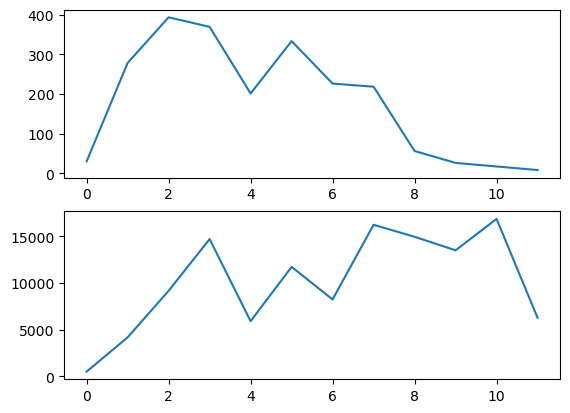

In [16]:
# Write your code here

import csv
import pathlib
import matplotlib.pyplot

def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number, _, zoom_factor = str(csv_file).split("_")
        cell_counter = 0
        cell_area_counter = 0
        reader = csv.DictReader(csv_file_handle)
        for row in reader:
            cell_counter += 1
            cell_area_counter += float(row[" Cell Area"])
        if dish_number not in dishes.keys():
            dishes[dish_number] = {}
        dishes[dish_number][day] = {
            "cell_count": cell_counter,
            "area": cell_area_counter
        } 
    return

csv_files = list()
data_folder = pathlib.Path("./data")
for csv_file in data_folder.iterdir():
    if "dish_1" in csv_file.stem:
        csv_files.append(csv_file)


dishes = {}
for csv_file in csv_files:
    process_csv(csv_file, dishes)

area = []
count = []
cells = {"area": area, "count": count}
# We know that the dishes are numbered so we iterate over them
for dish_number in range(1, len(dishes) + 1, 1):
    dish = dishes[str(dish_number)]
    dish_area = []
    dish_count = []
    # We know that the days in the dishes are numbered
    for day_number in range(1, len(dish) + 1, 1):
        value_pair = dish[str(day_number)]
        day_area = value_pair["area"]
        day_count = value_pair["cell_count"]
        dish_area.append(day_area)
        dish_count.append(day_count)
    area.append(dish_area)
    count.append(dish_count)

print(cells)

figure, axes = matplotlib.pyplot.subplots(2,1)
print(axes[0])
days = [day for day in range(0, len(cells["count"][0]), 1)]
for dish in range(0, len(cells["count"])):  
    axes[0].plot(days, cells["count"][dish], label=f"Dish {dish}")
    axes[1].plot(days, cells["area"][dish], label=f"Dish {dish}")
figure.set_title("Cell growth")
axes[0].set_title("Cell count")
axes[0].set_xlabel("Days")
axes[0].set_ylabel("Number of cells")
axes[1].set_title("Cell area")
axes[1].set_xlabel("Days")
axes[1].set_ylabel("Area covered by cells")
axes[0].legend()
axes[1].legend()
matplotlib.pyplot.show()

<details>
  <summary>Click to reveal suggested solution</summary>

```Python
import csv
import pathlib
import matplotlib.pyplot

def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number, _, zoom_factor = str(csv_file).split("_")
        cell_counter = 0
        cell_area_counter = 0
        reader = csv.DictReader(csv_file_handle)
        for row in reader:
            cell_counter += 1
            cell_area_counter += float(row[" Cell Area"])
        if dish_number not in dishes.keys():
            dishes[dish_number] = {}
        dishes[dish_number][day] = {
            "cell_count": cell_counter,
            "area": cell_area_counter
        } 
    return

csv_files = list()
data_folder = pathlib.Path("./data")
for csv_file in data_folder.iterdir():
    if "dish_1" in csv_file.stem:
        csv_files.append(csv_file)

dishes = {}
for csv_file in csv_files:
    process_csv(csv_file, dishes)

area = []
count = []
cells = {"area": area, "count": count}
# We know that the dishes are numbered so we iterate over them
for dish_number in range(1, len(dishes) + 1, 1):
    dish = dishes[str(dish_number)]
    dish_area = []
    dish_count = []
    # We know that the days in the dishes are numbered
    for day_number in range(1, len(dish) + 1, 1):
        value_pair = dish[str(day_number)]
        day_area = value_pair["area"]
        day_count = value_pair["cell_count"]
        dish_area.append(day_area)
        dish_count.append(day_count)
    area.append(dish_area)
    count.append(dish_count)

axes = matplotlib.pyplot.subplot(1,2)
days = [day for day in range(0, len(cells["count"][0]), 1)]
for day in days:
    axes[0].plot(days, cells["count"][day], label=f"Day {day}")
    axes[1].plot(days, cells["area"][day], label=f"Day {day}")
axes[0].sup_title("Cell count")
axes[1].sup_title("Cell area")
axes[0].legend()
axes[1].legend()
matplotlib.pyplot.show()
```

</details>

I assume that after the last exercise there are still a few questions open. Please ask them now.